# Similar to mineral composition, using K-means for finding % of water body from satellite images

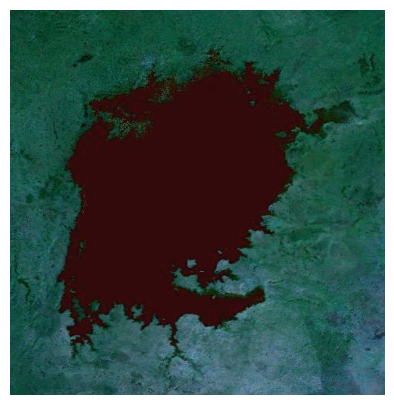

In [23]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

img = cv2.imread("Lake.jpeg", cv2.IMREAD_COLOR)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
img.shape

(494, 480, 3)

In [25]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_array = rgb_image.reshape((-1, 3))

print('Original Image Dimensions:', rgb_image.shape)
print('Reshaped 2D Array Dimensions:', pixel_array.shape)

Original Image Dimensions: (494, 480, 3)
Reshaped 2D Array Dimensions: (237120, 3)


Number of Clusters (k): 2
Number of Clusters (k): 3
Number of Clusters (k): 4
Number of Clusters (k): 5
Number of Clusters (k): 6
Number of Clusters (k): 7
Number of Clusters (k): 8
Number of Clusters (k): 9
Number of Clusters (k): 10
Number of Clusters (k): 11
Number of Clusters (k): 12
Number of Clusters (k): 13
Number of Clusters (k): 14
Number of Clusters (k): 15
Number of Clusters (k): 16
Number of Clusters (k): 17
Number of Clusters (k): 18
Number of Clusters (k): 19


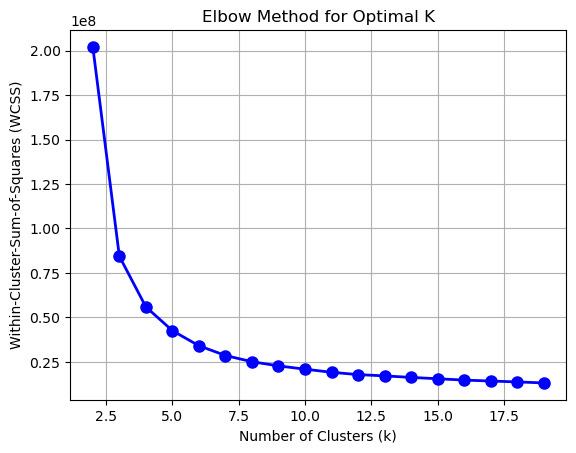

In [26]:
distortions = []

k_values = range(2, 20)

for num_clusters in k_values:
    print("Number of Clusters (k):", num_clusters)
    
    k_means = KMeans(n_clusters=num_clusters, n_init="auto", random_state=42)
    k_means.fit(pixel_array)
    
    distortions.append(k_means.inertia_)

plt.plot(k_values, distortions, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.grid(True)
plt.show()


### WCSS starts to taper off starting at around 5 to 7.5
### so, choosing k=8

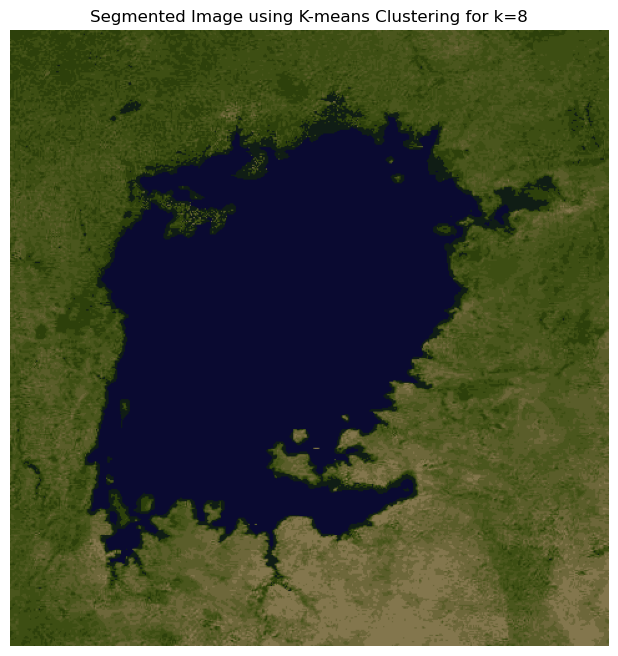

In [32]:
num_clusters = 8

kmeans = KMeans(n_clusters=num_clusters, random_state=42,n_init='auto')
kmeans.fit(pixel_array)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
center = np.uint8(centroids)
segmented_data = center[labels.flatten()]
seg_image = segmented_data.reshape(img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(seg_image, cmap='viridis')  # You can choose a different colormap if desired
plt.axis('off')
plt.title('Segmented Image using K-means Clustering for k=8')
plt.show()


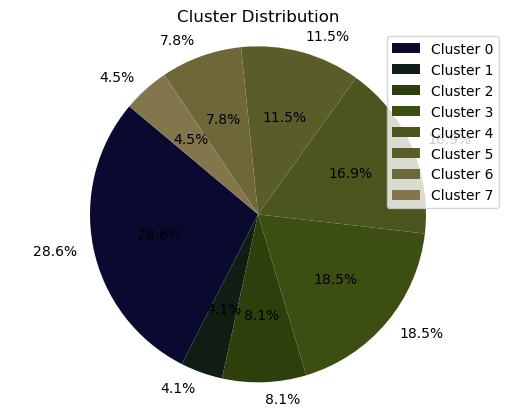

In [33]:
colors, counts = np.unique(seg_image.reshape(-1, 3), axis=0, return_counts=True)

total_pixels = np.sum(counts)
percentages = (counts / total_pixels) * 100
percentage_labels = [f"{p:.1f}%" for p in percentages]

plt.pie(counts, colors=colors / 255, labels=percentage_labels, autopct="%1.1f%%", startangle=140)
legend_labels = [f"Cluster {i}" for i in range(len(counts))]
plt.title("Cluster Distribution")
plt.legend(legend_labels)
plt.axis('equal') 
plt.show()

### Silohoutte score 

In [ ]:
clusters= range(2,6)

for n_clusters in clusters:
    fig, ax1 = plt.subplots(1,1)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(pixel_array) + (n_clusters + 1) * 10])
    print("cluster :",n_clusters)
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(pixel_array)
    
    silhouette_avg = silhouette_score(pixel_array, cluster_labels)
    sample_silhouette_values = silhouette_samples(pixel_array, cluster_labels)

    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    y_lower=10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

cluster : 2
